<a href="https://colab.research.google.com/github/magedyasse/ML-Topic/blob/main/MNIST_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
# pip install keras


In [68]:
import numpy as np
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import pandas as pd


In [69]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [70]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
60000 train samples
10000 test samples


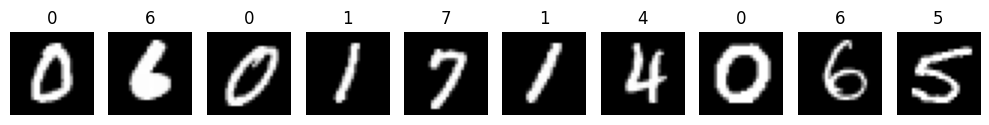

In [71]:
# Plot 10 random images from the training set
plt.figure(figsize=(10, 2))
for i in range(10):
    idx = np.random.randint(0, x_train.shape[0])
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(str(y_train[idx]))
    plt.axis('off')
plt.tight_layout()
plt.show()

In [72]:
# x_train = x_train.reshape(-1, 784)
# x_test = x_test.reshape(-1, 784)

In [73]:
# Scale images to the [0, 1] range
x_train = x_train / 255.0
x_test = x_test / 255.0
# Make sure images have shape (784)
x_train = x_train.reshape(60000,-1)
x_test = x_test.reshape(10000,-1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 784)
60000 train samples
10000 test samples


In [74]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# One Layer

In [75]:
model = Sequential([
    Dense(10, activation='softmax', input_shape=(784,))
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

# - Multi Layer for Just Test

In [76]:
# model_ = Sequential([
#     Dense(128, activation='relu', input_shape=(784,)),
#     Dense(64, activation='relu'),
#     Dense(10, activation='softmax')
# ])

In [77]:
# model_.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#                metrics=['accuracy'])

In [78]:
# history = model_.fit(x_train, y_train, epochs=10,  validation_data=(x_test, y_test))


In [79]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [80]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8150 - loss: 0.7126 - val_accuracy: 0.9149 - val_loss: 0.3092
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9151 - loss: 0.3105 - val_accuracy: 0.9215 - val_loss: 0.2843
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9186 - loss: 0.2864 - val_accuracy: 0.9250 - val_loss: 0.2725
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9217 - loss: 0.2764 - val_accuracy: 0.9246 - val_loss: 0.2701
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9248 - loss: 0.2651 - val_accuracy: 0.9255 - val_loss: 0.2693
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9273 - loss: 0.2625 - val_accuracy: 0.9233 - val_loss: 0.2708
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9265 - loss: 0.2629 - val_accuracy: 0.9269 - val_loss: 0.2659
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9303 - loss: 0.2517 

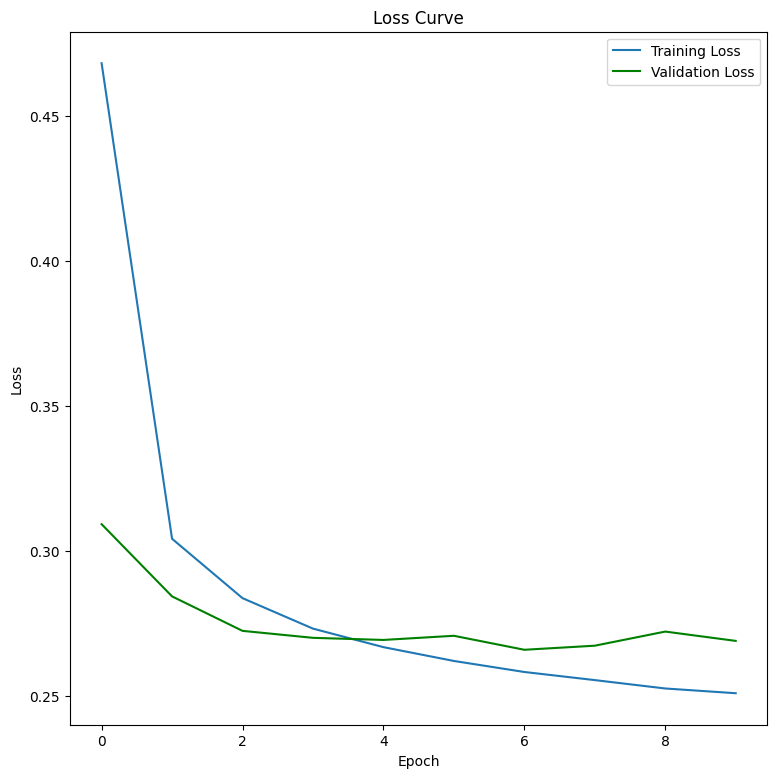

In [84]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', color='g')
plt.legend()
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [85]:
from sklearn.metrics import classification_report

y_pred = np.argmax(model.predict(x_test), axis=1)

y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       980
           1       0.97      0.97      0.97      1135
           2       0.94      0.89      0.91      1032
           3       0.89      0.93      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.92      0.87      0.89       892
           6       0.95      0.95      0.95       958
           7       0.95      0.91      0.93      1028
           8       0.87      0.89      0.88       974
           9       0.90      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [83]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9145 - loss: 0.3053
Test score: 0.26899826526641846
Test accuracy: 0.9262999892234802
